In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# fetch dataset
dataset = fetch_ucirepo(id=468)

dataset.metadata

{'uci_id': 468,
 'name': 'Online Shoppers Purchasing Intention Dataset',
 'repository_url': 'https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset',
 'data_url': 'https://archive.ics.uci.edu/static/public/468/data.csv',
 'abstract': 'Of the 12,330 sessions in the dataset,\n84.5% (10,422) were negative class samples that did not\nend with shopping, and the rest (1908) were positive class\nsamples ending with shopping.',
 'area': 'Business',
 'tasks': ['Classification', 'Clustering'],
 'characteristics': ['Multivariate'],
 'num_instances': 12330,
 'num_features': 17,
 'feature_types': ['Integer', 'Real'],
 'demographics': [],
 'target_col': ['Revenue'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2018,
 'last_updated': 'Thu Jan 11 2024',
 'dataset_doi': '10.24432/C5F88Q',
 'creators': ['C. Sakar', 'Yomi Kastro'],
 'intro_paper': {'ID': 367,
  'type': 'NATIVE',
  'title': 'Real-time prediction

In [3]:
features = dataset.data.features
targets = dataset.data.targets

data = pd.concat([features, targets], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
data.Revenue.value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

<Axes: >

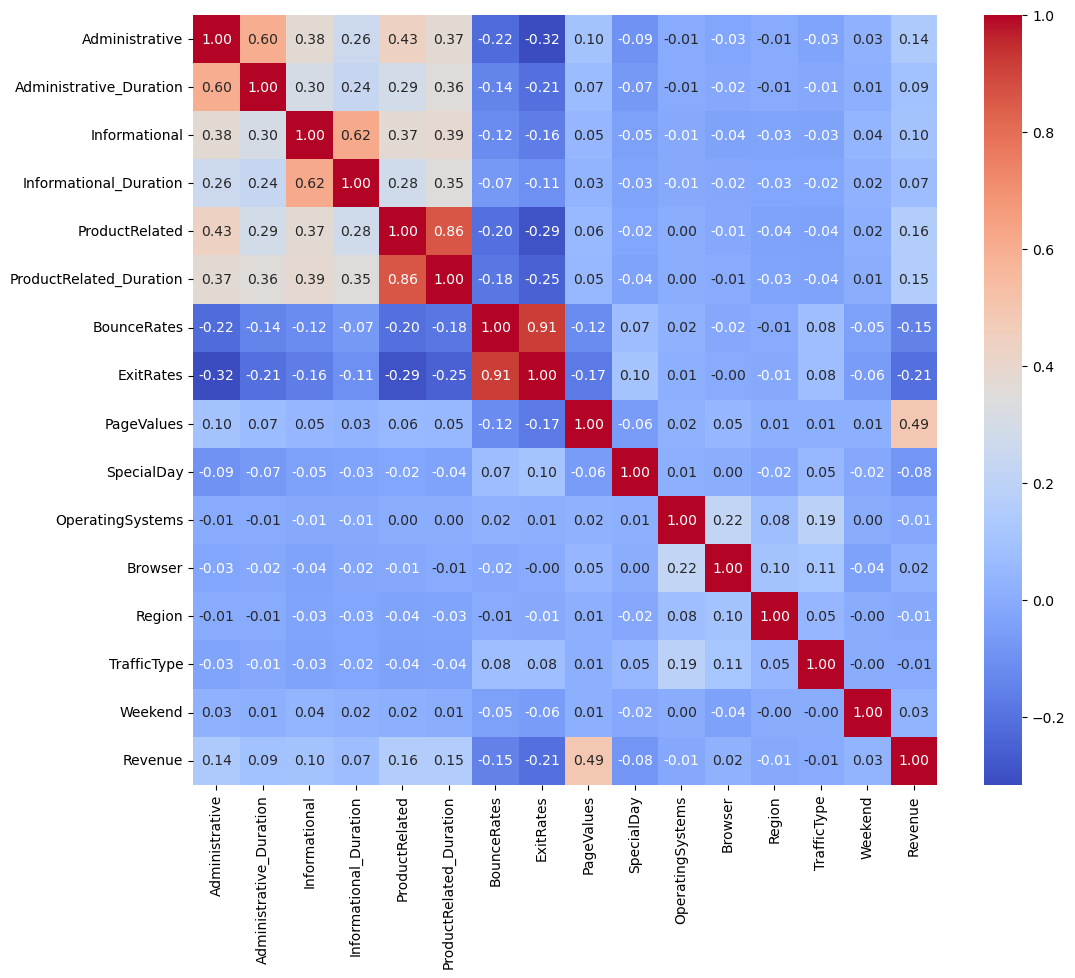

In [5]:
# correlation analysis and elimination with heatmap
corr = data.select_dtypes(include=[np.number, bool]).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', fmt='.2f', annot=True)

In [6]:
# correlation analysis and elimination with heatmap
data.insert(loc=0, column='SessionDuration', value=data.Administrative_Duration+data.Informational_Duration+data.ProductRelated_Duration)
data.insert(loc=1, column='AdministrativeAvgDuration', value=(data.Administrative_Duration/data.Administrative).replace(np.nan, 0))
data.insert(loc=4, column='InformationalAvgDuration', value=(data.Informational_Duration/data.Informational).replace(np.nan, 0))
data.insert(loc=7, column='ProductRelatedAvgDuration', value=(data.ProductRelated_Duration/data.ProductRelated).replace(np.nan, 0))

In [7]:
data.isnull().sum()

SessionDuration              0
AdministrativeAvgDuration    0
Administrative               0
Administrative_Duration      0
InformationalAvgDuration     0
Informational                0
Informational_Duration       0
ProductRelatedAvgDuration    0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                   0
SpecialDay                   0
Month                        0
OperatingSystems             0
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

<Axes: >

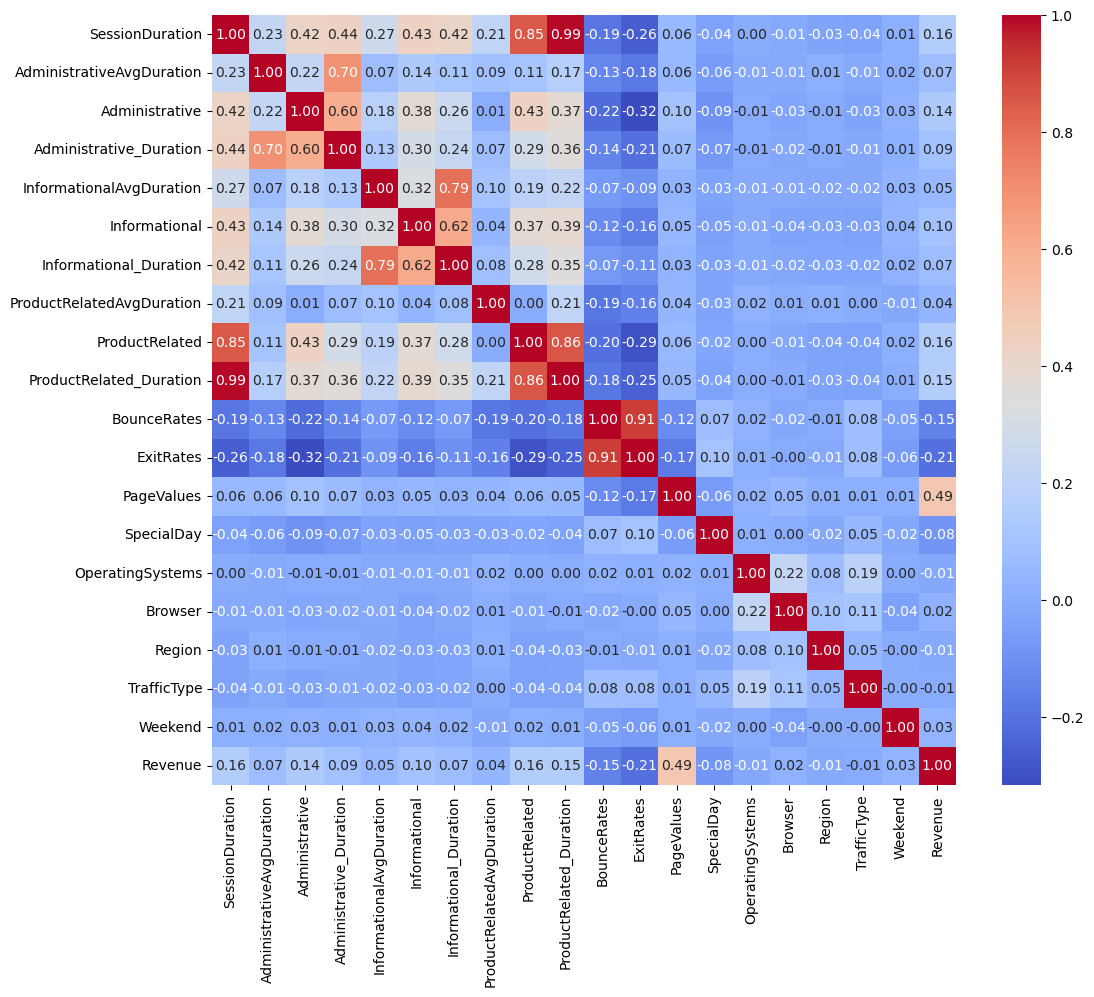

In [8]:
corr = data.select_dtypes(include=[np.number, bool]).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', fmt='.2f', annot=True)

In [9]:
# identify highly correlated features (we'll set the threshold to 0.9)
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
# check for both highly pos and neg (some cases, neg extremes should be kept)
high_corr = [col for col in upper.columns if any(upper[col].abs() > 0.9)]
high_corr

['ProductRelated_Duration', 'ExitRates']

<Axes: >

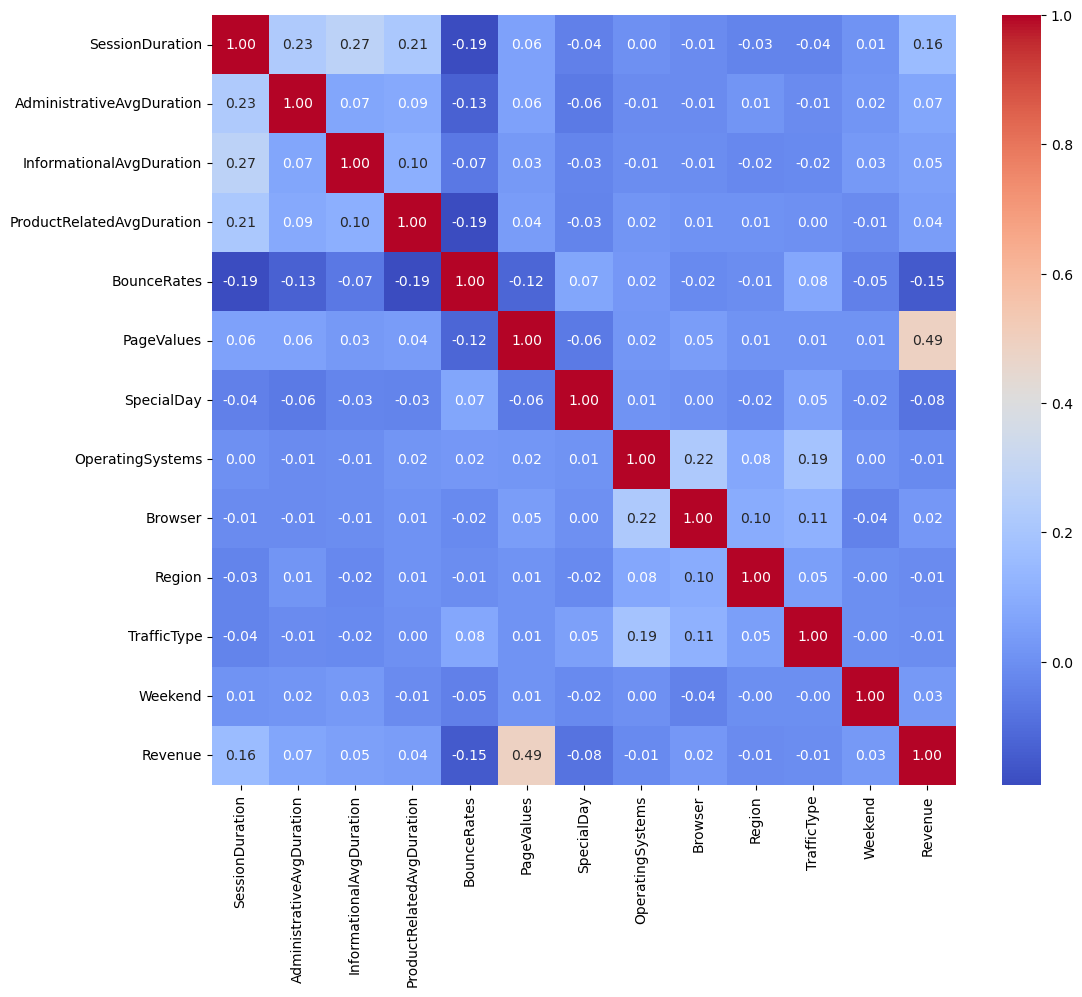

In [10]:
data.drop(['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
           'ProductRelated', 'ProductRelated_Duration', 'ExitRates'], axis=1, inplace=True)

corr = data.select_dtypes(include=[np.number, bool]).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', fmt='.2f', annot=True)

In [11]:
data.isnull().sum()

SessionDuration              0
AdministrativeAvgDuration    0
InformationalAvgDuration     0
ProductRelatedAvgDuration    0
BounceRates                  0
PageValues                   0
SpecialDay                   0
Month                        0
OperatingSystems             0
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

In [12]:
# Data preprocessing
# categorical encoding (one-hot encoding)
data = pd.get_dummies(data, columns=['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType'], dtype=int, drop_first=True)

# type conversion
data[['Weekend', 'Revenue']] = data[['Weekend', 'Revenue']].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 66 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SessionDuration                12330 non-null  float64
 1   AdministrativeAvgDuration      12330 non-null  float64
 2   InformationalAvgDuration       12330 non-null  float64
 3   ProductRelatedAvgDuration      12330 non-null  float64
 4   BounceRates                    12330 non-null  float64
 5   PageValues                     12330 non-null  float64
 6   SpecialDay                     12330 non-null  float64
 7   Weekend                        12330 non-null  int32  
 8   Revenue                        12330 non-null  int32  
 9   Month_Dec                      12330 non-null  int32  
 10  Month_Feb                      12330 non-null  int32  
 11  Month_Jul                      12330 non-null  int32  
 12  Month_June                     12330 non-null 

In [13]:
from sklearn.preprocessing import StandardScaler
# feature scaling
continuous_cols = data.select_dtypes(include=[float]).columns
scaler = StandardScaler()
data[continuous_cols] = scaler.fit_transform(data[continuous_cols])

In [14]:
# check for data imbalance
print(data.Revenue.value_counts().to_string())

neg, pos = np.bincount(data['Revenue'])
total = neg + pos
print(f"Minority class at {100*pos/total:.2f}% of total")

Revenue
0    10422
1     1908
Minority class at 15.47% of total


In [15]:
from sklearn.model_selection import train_test_split

X = data.drop('Revenue', axis=1)
y = data['Revenue']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (9864, 65)
Test set shape: (2466, 65)


In [16]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

def evaluate_clf(clf, clf_name, X_train, X_test, y_train, y_test, sampling_tech='', df=None):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)

    entry = [clf_name, sampling_tech, accuracy, precision, recall, f1, fpr, tpr, roc_auc]
    if df is not None:
        df.loc[len(df)] = entry
    return y_pred, entry

def modelling(X_train, X_test, y_train, y_test):
    
    classifiers = {
        'KNN': KNeighborsClassifier(),
        'SVM': SVC(random_state=42, probability=True),
        'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
        'RandomForest': RandomForestClassifier(random_state=42),
        'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss')
    }
    
    sampling_techniques = {}
    sampling_techniques['base'] = {'X_train': X_train, 'y_train': y_train}
    
    # oversampling using RandomOverSampler
    oversampler = RandomOverSampler(random_state=42)
    X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)
    sampling_techniques['oversampling'] = {'X_train': X_train_oversampled, 'y_train': y_train_oversampled}
    
    # undersampling using RandomUnderSampler
    undersampler = RandomUnderSampler(random_state=42)
    X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)
    sampling_techniques['undersampling'] = {'X_train': X_train_undersampled, 'y_train': y_train_undersampled}

    results = pd.DataFrame(columns=['Model', 'SamplingTechnique', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'FPR', 'TPR', 'AUC'])

    for name, clf in classifiers.items():
        # confusion matrix figure
        fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
        fig.suptitle(f'Confusion Matrices for {name}', fontsize=16)

        for i, (method, train_data) in enumerate(sampling_techniques.items()):
            y_pred, _ = evaluate_clf(clf, name, train_data['X_train'], X_test, train_data['y_train'], y_test, method, df=results)

            # plot confusion matrix
            cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
            display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
            display.plot(ax=axs[i], cmap='Blues')
            axs[i].set_title(method) 
            
        plt.tight_layout()
        plt.show()
        print(results.loc[len(results)-len(sampling_techniques.keys()):len(results)-1].drop(['TPR', 'FPR'], axis=1).to_string())
    return results

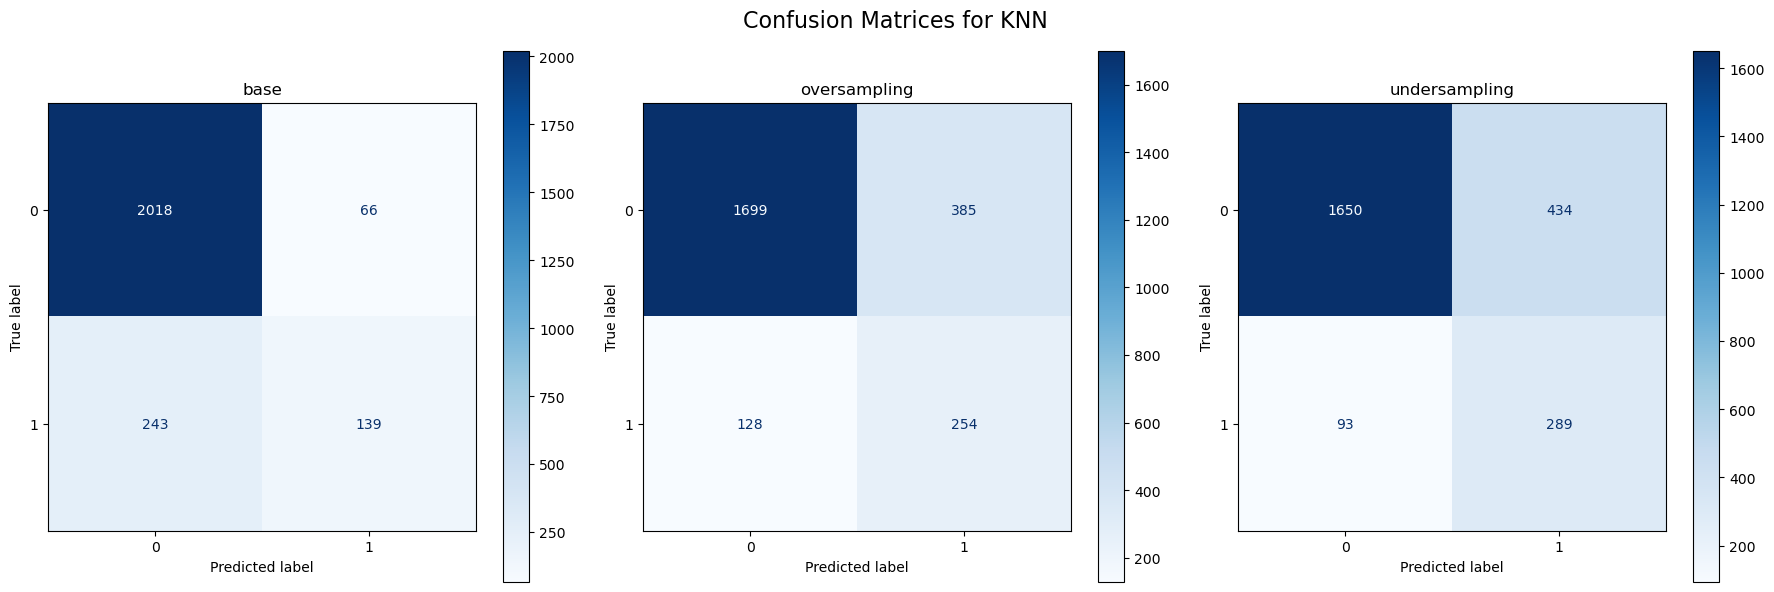

  Model SamplingTechnique  Accuracy  Precision    Recall  F1-Score       AUC
0   KNN              base  0.874696   0.678049  0.363874  0.473595  0.791291
1   KNN      oversampling  0.791971   0.397496  0.664921  0.497551  0.779506
2   KNN     undersampling  0.786294   0.399723  0.756545  0.523077  0.824968


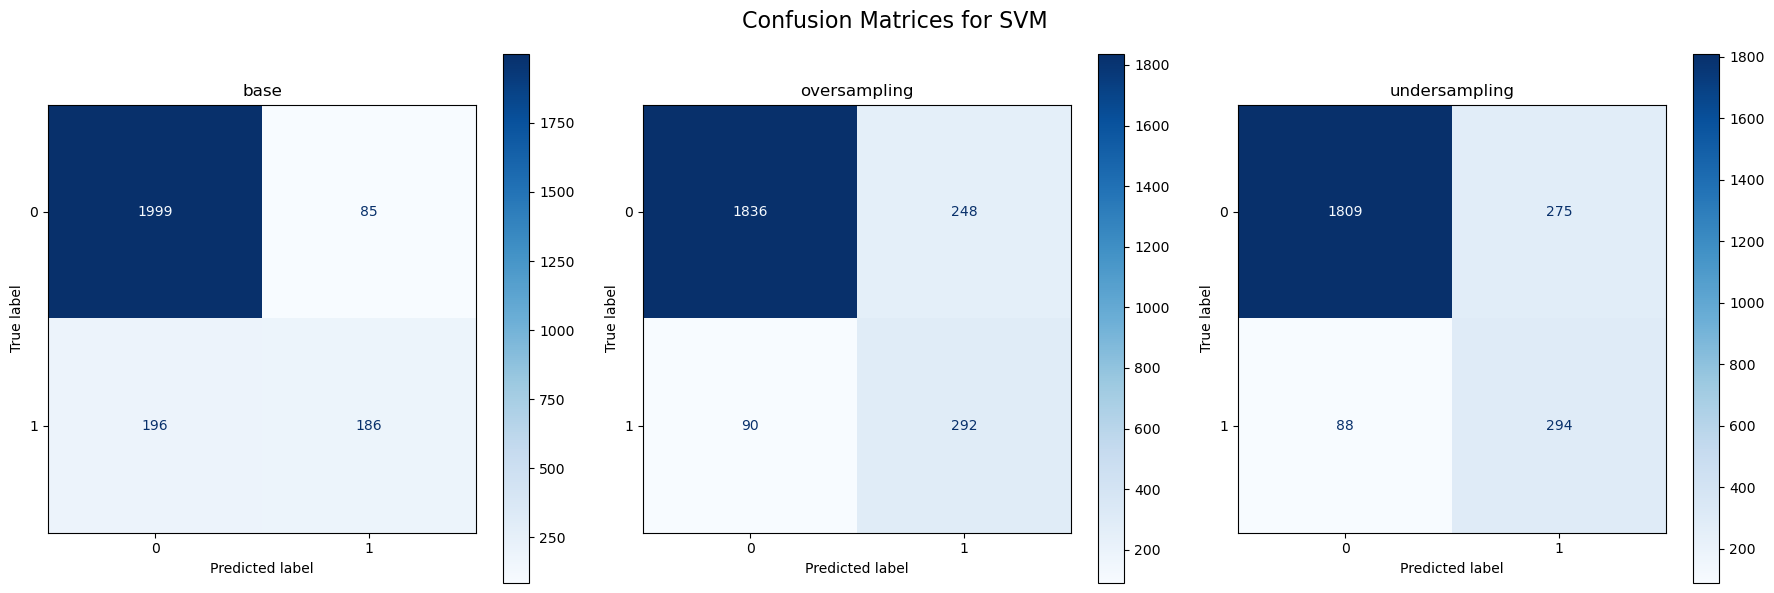

  Model SamplingTechnique  Accuracy  Precision    Recall  F1-Score       AUC
3   SVM              base  0.886050   0.686347  0.486911  0.569678  0.884297
4   SVM      oversampling  0.862936   0.540741  0.764398  0.633406  0.899073
5   SVM     undersampling  0.852798   0.516696  0.769634  0.618297  0.891391


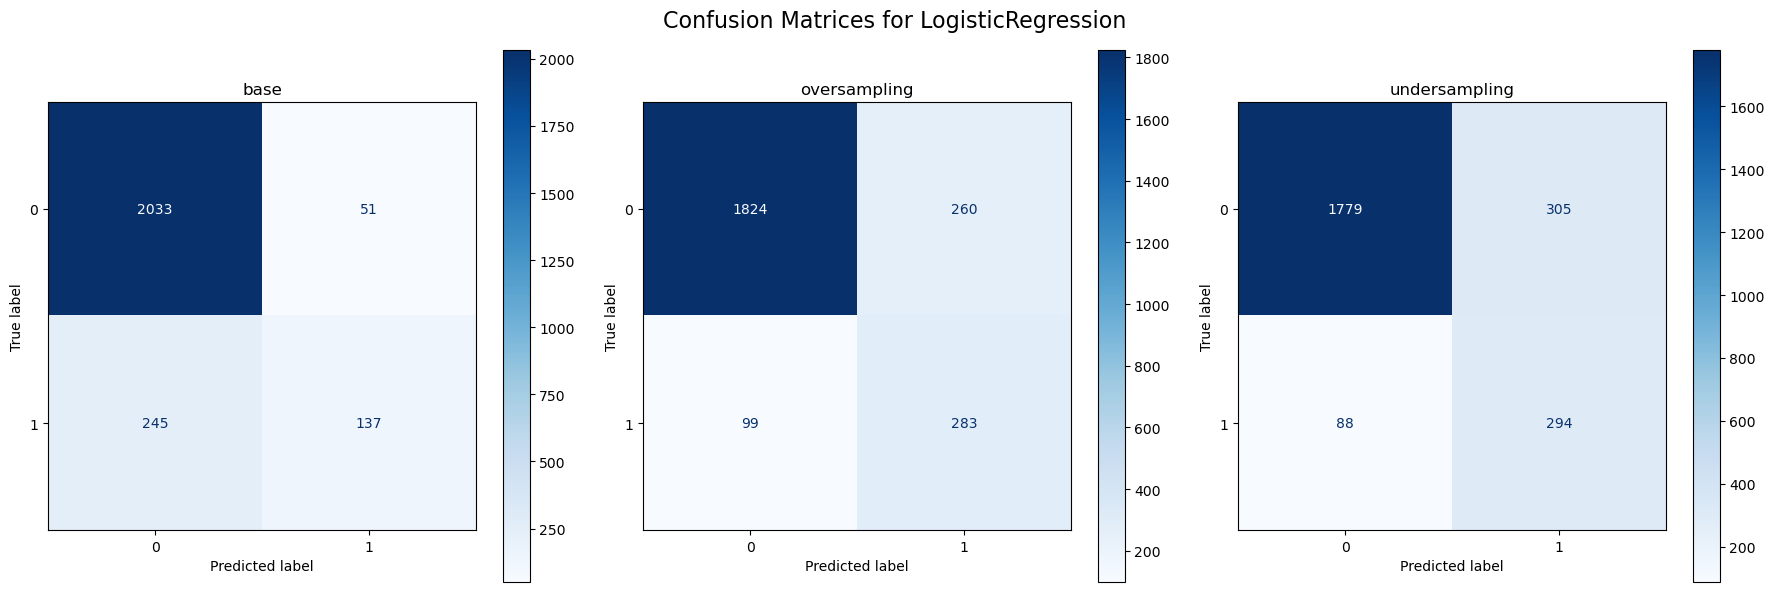

                Model SamplingTechnique  Accuracy  Precision    Recall  F1-Score       AUC
6  LogisticRegression              base  0.879968   0.728723  0.358639  0.480702  0.886828
7  LogisticRegression      oversampling  0.854420   0.521179  0.740838  0.611892  0.895777
8  LogisticRegression     undersampling  0.840633   0.490818  0.769634  0.599388  0.894071


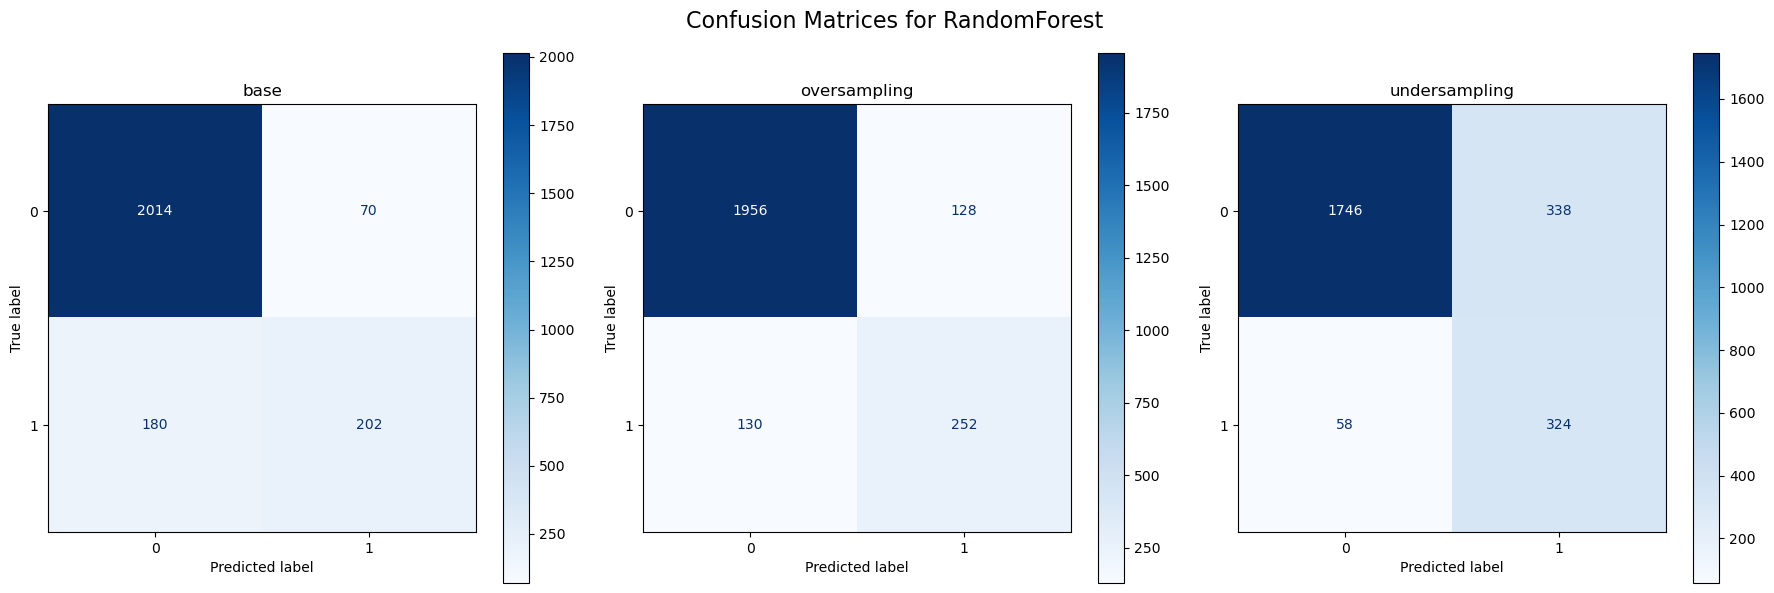

           Model SamplingTechnique  Accuracy  Precision    Recall  F1-Score       AUC
9   RandomForest              base  0.898621   0.742647  0.528796  0.617737  0.918676
10  RandomForest      oversampling  0.895377   0.663158  0.659686  0.661417  0.918628
11  RandomForest     undersampling  0.839416   0.489426  0.848168  0.620690  0.918795


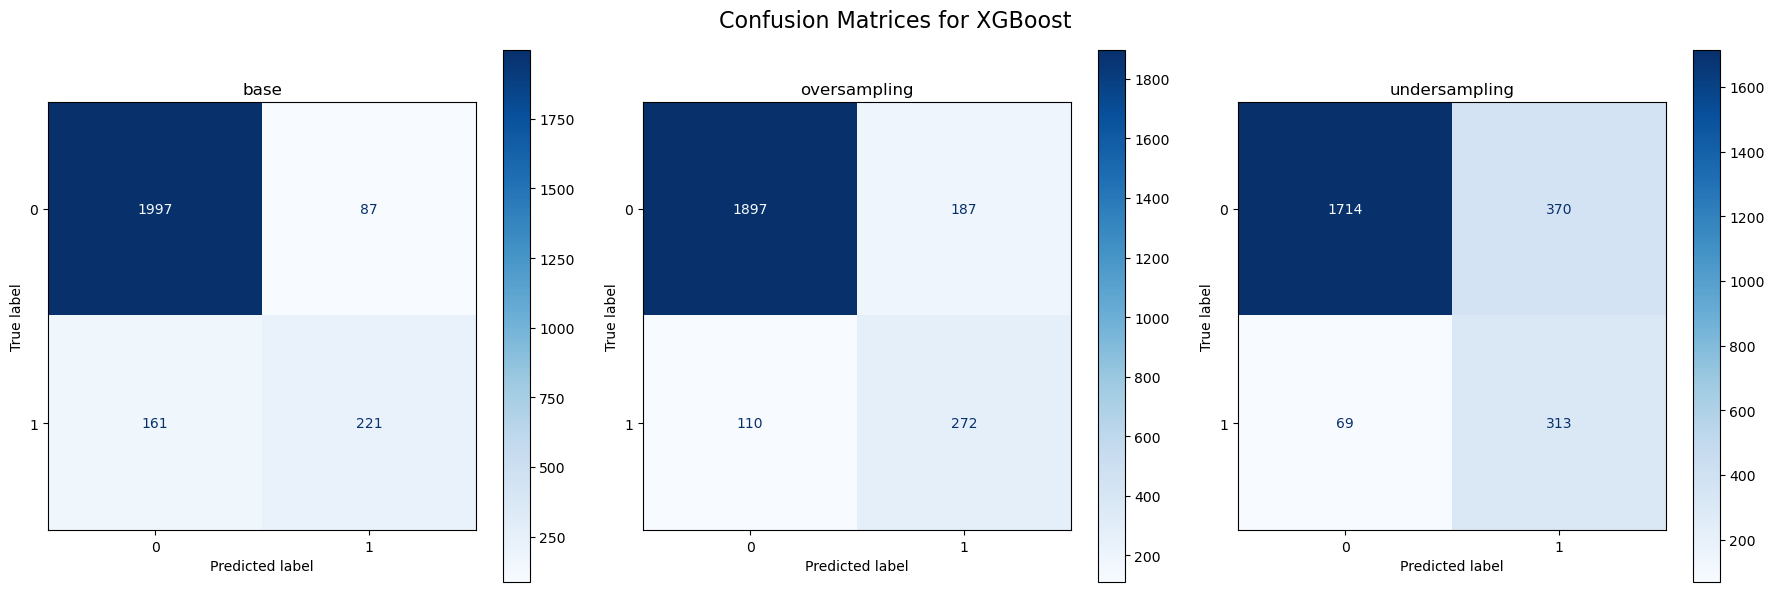

      Model SamplingTechnique  Accuracy  Precision    Recall  F1-Score       AUC
12  XGBoost              base  0.899432   0.717532  0.578534  0.640580  0.916867
13  XGBoost      oversampling  0.879562   0.592593  0.712042  0.646849  0.916836
14  XGBoost     undersampling  0.821979   0.458272  0.819372  0.587793  0.911535


In [17]:
# modeling approach without Feature Selection
results = modelling(X_train, X_test, y_train, y_test)

In [18]:
results

,Model,SamplingTechnique,Accuracy,Precision,Recall,F1-Score,FPR,TPR,AUC
0,KNN,base,0.874696,0.678049,0.363874,0.473595,"[0.0, 0.0033589251439539347, 0.011036468330134...","[0.0, 0.10209424083769633, 0.225130890052356, ...",0.791291
1,KNN,oversampling,0.791971,0.397496,0.664921,0.497551,"[0.0, 0.058061420345489445, 0.1266794625719769...","[0.0, 0.3586387434554974, 0.5680628272251309, ...",0.779506
2,KNN,undersampling,0.786294,0.399723,0.756545,0.523077,"[0.0, 0.03166986564299424, 0.1036468330134357,...","[0.0, 0.337696335078534, 0.56282722513089, 0.7...",0.824968
3,SVM,base,0.886050,0.686347,0.486911,0.569678,"[0.0, 0.0, 0.0, 0.0004798464491362764, 0.00047...","[0.0, 0.002617801047120419, 0.0628272251308900...",0.884297
4,SVM,oversampling,0.862936,0.540741,0.764398,0.633406,"[0.0, 0.0004798464491362764, 0.000479846449136...","[0.0, 0.0, 0.010471204188481676, 0.01047120418...",0.899073
5,SVM,undersampling,0.852798,0.516696,0.769634,0.618297,"[0.0, 0.0, 0.0, 0.0004798464491362764, 0.00047...","[0.0, 0.002617801047120419, 0.0052356020942408...",0.891391
6,LogisticRegression,base,0.879968,0.728723,0.358639,0.480702,"[0.0, 0.0, 0.0, 0.0004798464491362764, 0.00047...","[0.0, 0.002617801047120419, 0.0052356020942408...",0.886828
7,LogisticRegression,oversampling,0.854420,0.521179,0.740838,0.611892,"[0.0, 0.0, 0.0, 0.0004798464491362764, 0.00047...","[0.0, 0.002617801047120419, 0.0052356020942408...",0.895777
8,LogisticRegression,undersampling,0.840633,0.490818,0.769634,0.599388,"[0.0, 0.0, 0.0, 0.0004798464491362764, 0.00047...","[0.0, 0.002617801047120419, 0.0052356020942408...",0.894071
9,RandomForest,base,0.898621,0.742647,0.528796,0.617737,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.000479846449136276...","[0.0, 0.002617801047120419, 0.0052356020942408...",0.918676


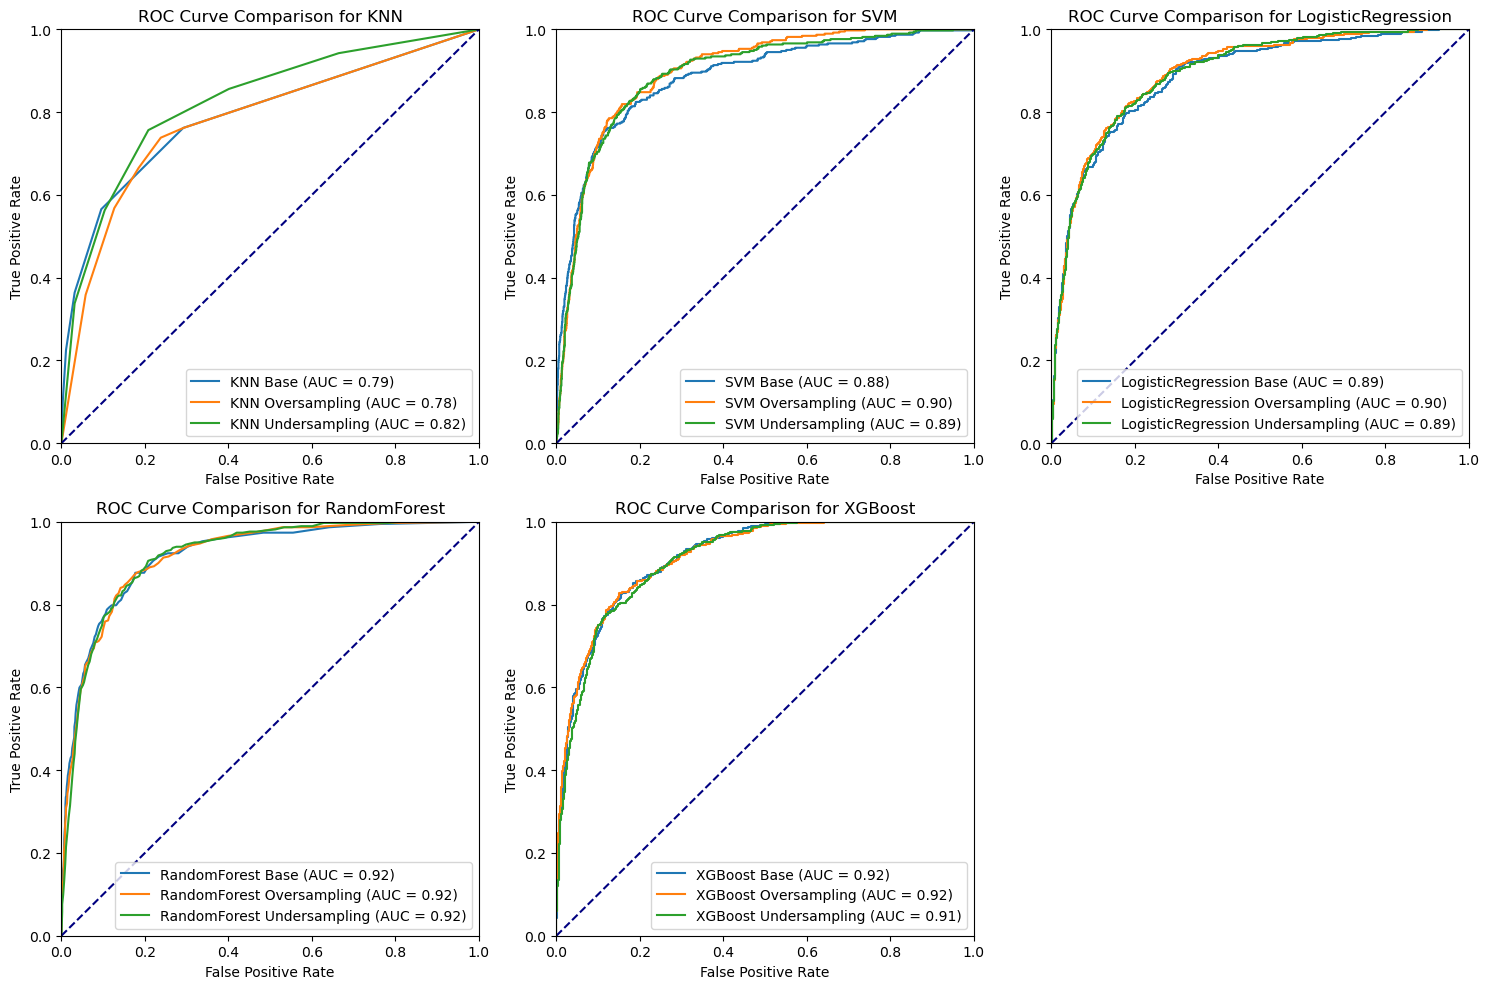

In [19]:
from math import ceil

def sampling_comparison(data):
    classifiers = data['Model'].unique()
    
    fig_cols = 3
    fig_rows = ceil(len(classifiers) / fig_cols)
    fig, axs = plt.subplots(fig_rows, fig_cols, figsize=(15, 10))

    # remove axis for extra plots
    if fig_rows > 1:
        for col in range(len(classifiers)%fig_cols, fig_cols):
            axs[fig_rows-1, col].axis('off')
        
    axs = axs.flatten()
    
    for ax, clf_name in zip(axs, classifiers):
        filtered = data[data['Model'] == clf_name]
        
        for technique in data['SamplingTechnique'].unique():
            entry = filtered[filtered['SamplingTechnique'] == technique]

            fpr = entry['FPR'].iloc[0]
            tpr = entry['TPR'].iloc[0]
            auc = entry['AUC'].iloc[0]

            ax.plot(fpr, tpr, label=f'{clf_name} {technique.capitalize()} (AUC = {auc:.2f})')
        
        ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.0])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title(f'ROC Curve Comparison for {clf_name}')
        ax.legend(loc="lower right")
    
    plt.tight_layout()
    plt.show()
    return fig
    
figure1 = sampling_comparison(results)

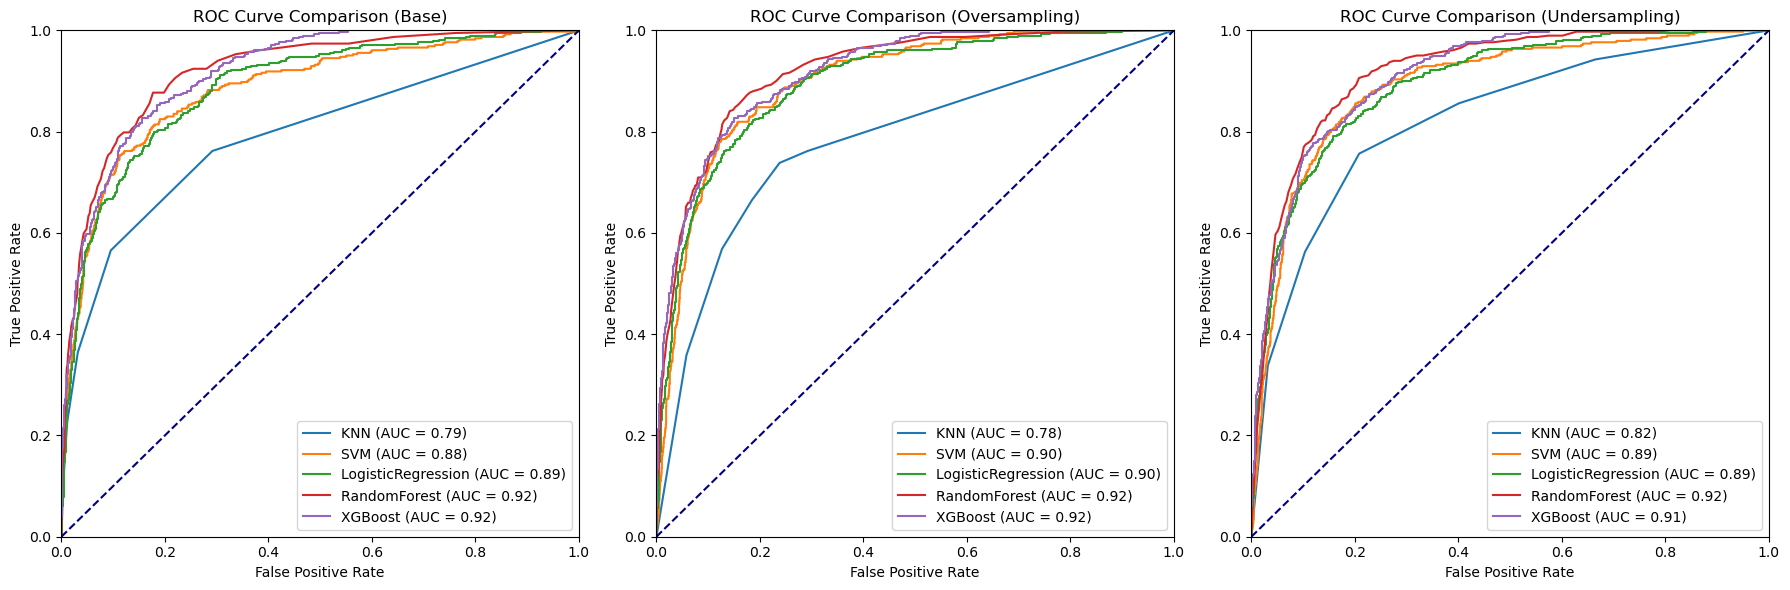

In [20]:
def model_comparison(data):
    sampling_techs = data['SamplingTechnique'].unique()
    
    fig_cols = 3
    fig_rows = ceil(len(sampling_techs) / fig_cols)
    fig, axs = plt.subplots(fig_rows, fig_cols, figsize=(18, 6))

    # remove axis for extra plots (not applicable atm)
    if fig_rows > 1:
        for col in range(len(sampling_techs)%fig_cols, fig_cols):
            axs[fig_rows-1, col].axis('off')
    
    axs = axs.flatten()

    for ax, technique in zip(axs, sampling_techs):
        # filter data by sampling techniques
        filtered = data[data['SamplingTechnique'] == technique]
        
        for clf_name in data['Model'].unique():
            entry = filtered[filtered['Model'] == clf_name]

            fpr = entry['FPR'].iloc[0]
            tpr = entry['TPR'].iloc[0]
            auc = entry['AUC'].iloc[0]
            
            ax.plot(fpr, tpr, label=f'{clf_name} (AUC = {auc:.2f})')
        
        ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
        
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.0])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title(f'ROC Curve Comparison ({technique.capitalize()})')
        ax.legend(loc="lower right")
    
    plt.tight_layout()
    plt.show()
    return fig
    
figure2 = model_comparison(results)

In [21]:
# SelectKBest for Feature Selection
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
selected_features = X_train.columns[selector.get_support()]

selected_features

Index(['SessionDuration', 'AdministrativeAvgDuration', 'BounceRates',
       'PageValues', 'SpecialDay', 'Month_May', 'Month_Nov', 'TrafficType_2',
       'TrafficType_3', 'VisitorType_Returning_Visitor'],
      dtype='object')

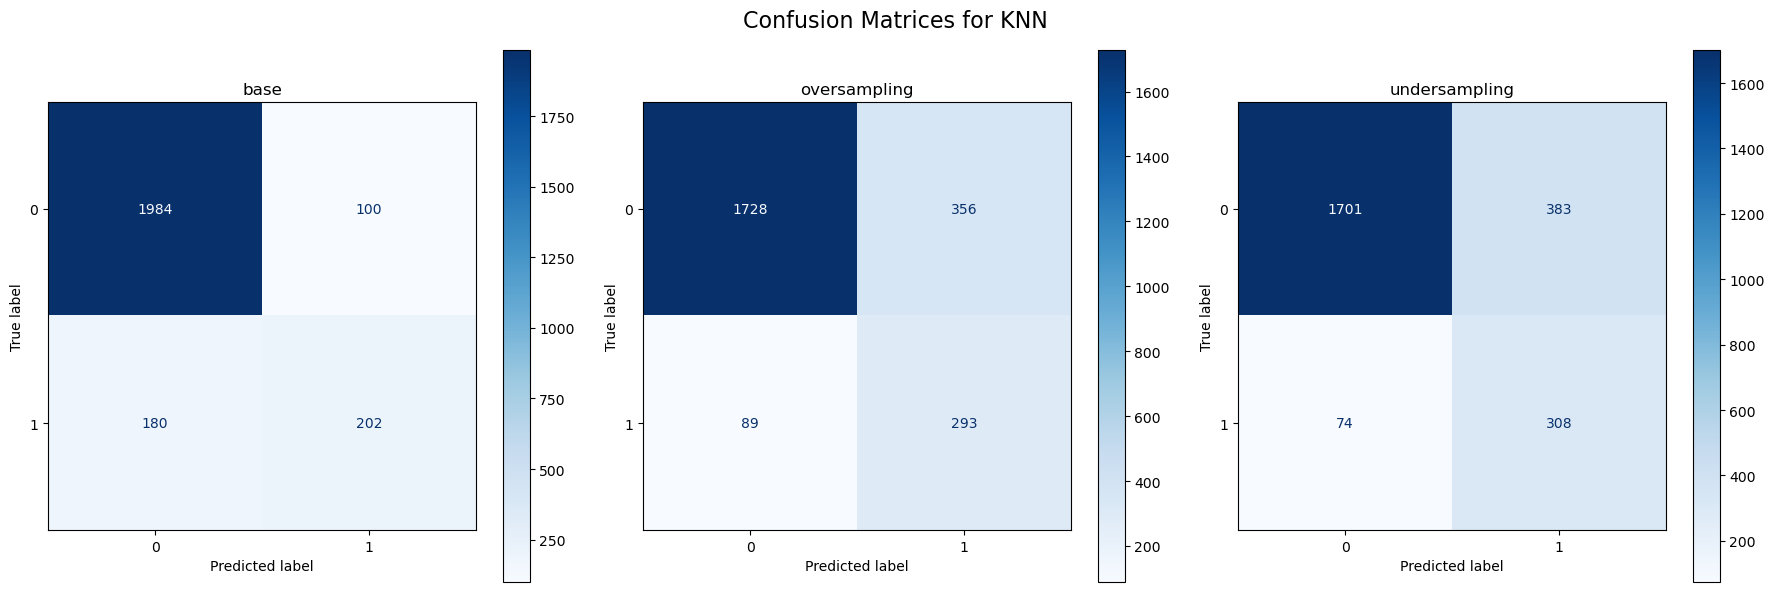

  Model SamplingTechnique  Accuracy  Precision    Recall  F1-Score       AUC
0   KNN              base  0.886456   0.668874  0.528796  0.590643  0.851837
1   KNN      oversampling  0.819546   0.451464  0.767016  0.568380  0.838831
2   KNN     undersampling  0.814680   0.445731  0.806283  0.574091  0.874079


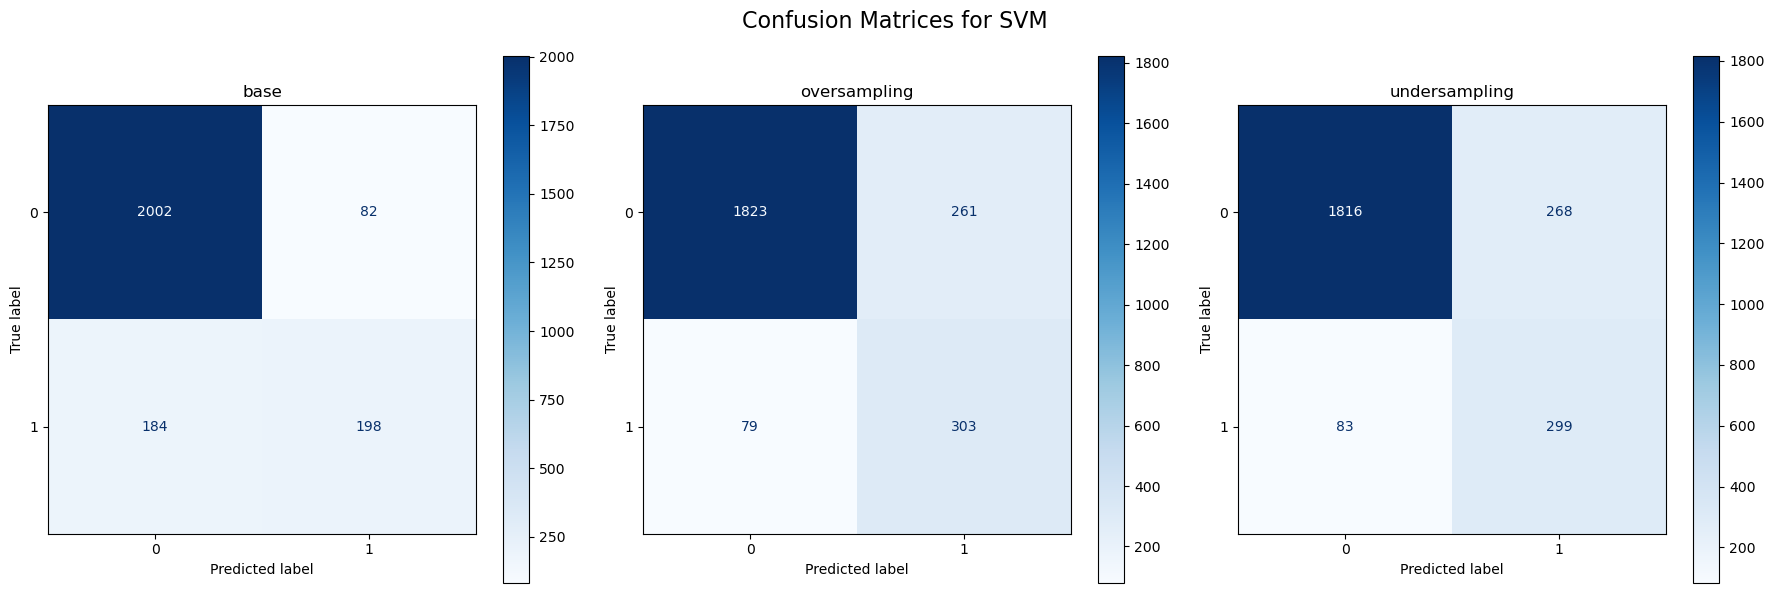

  Model SamplingTechnique  Accuracy  Precision    Recall  F1-Score       AUC
3   SVM              base  0.892133   0.707143  0.518325  0.598187  0.887684
4   SVM      oversampling  0.862125   0.537234  0.793194  0.640592  0.888972
5   SVM     undersampling  0.857664   0.527337  0.782723  0.630137  0.887872


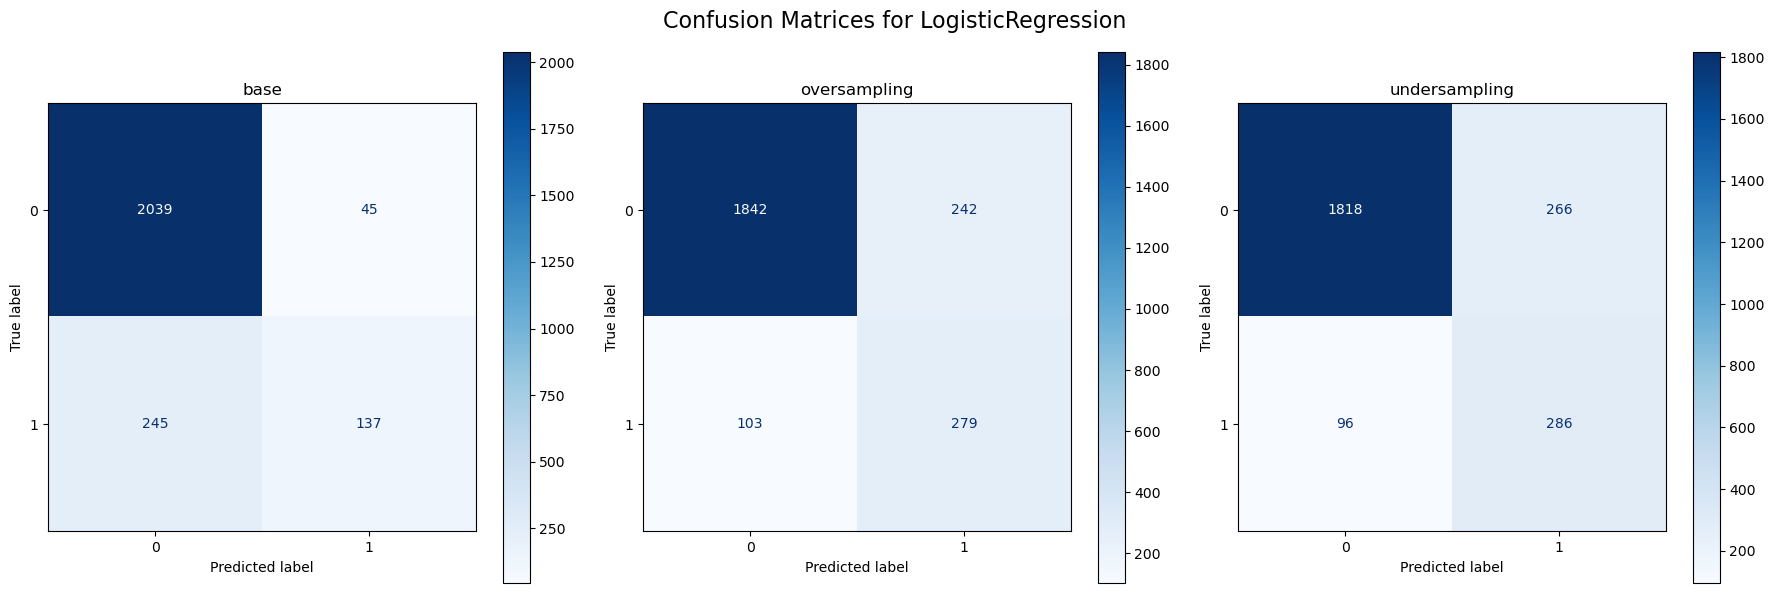

                Model SamplingTechnique  Accuracy  Precision    Recall  F1-Score       AUC
6  LogisticRegression              base  0.882401   0.752747  0.358639  0.485816  0.891674
7  LogisticRegression      oversampling  0.860097   0.535509  0.730366  0.617940  0.898146
8  LogisticRegression     undersampling  0.853204   0.518116  0.748691  0.612420  0.897658


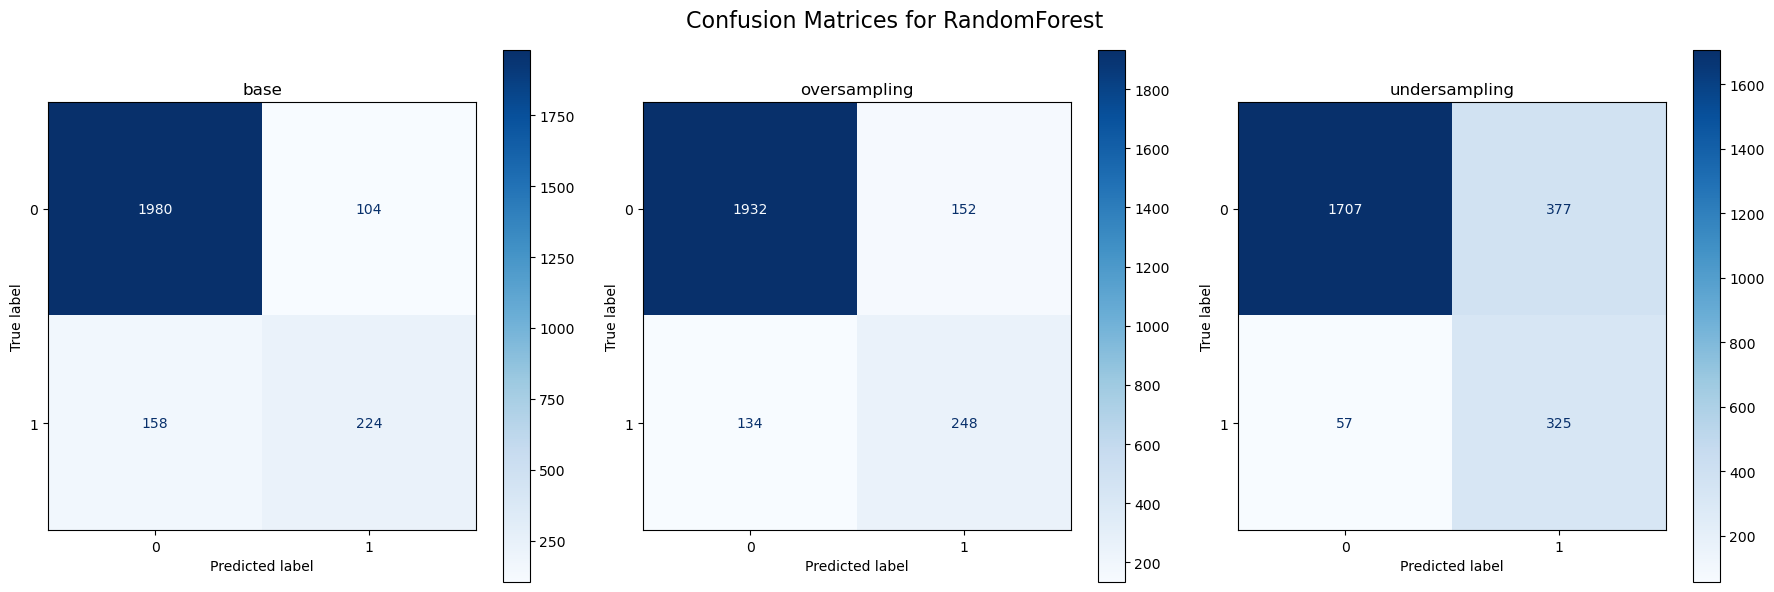

           Model SamplingTechnique  Accuracy  Precision    Recall  F1-Score       AUC
9   RandomForest              base  0.893755   0.682927  0.586387  0.630986  0.910372
10  RandomForest      oversampling  0.884023   0.620000  0.649215  0.634271  0.906789
11  RandomForest     undersampling  0.824006   0.462963  0.850785  0.599631  0.911451


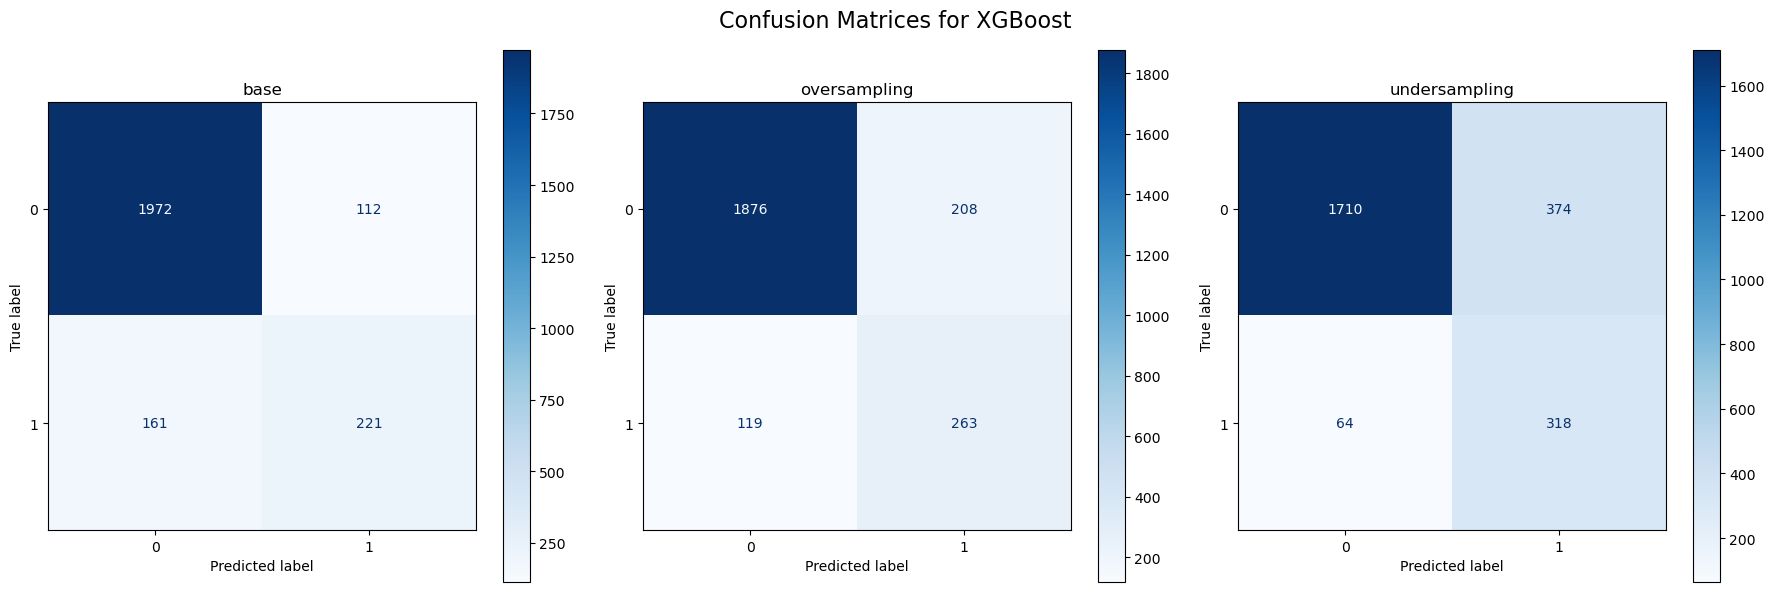

      Model SamplingTechnique  Accuracy  Precision    Recall  F1-Score       AUC
12  XGBoost              base  0.889294   0.663664  0.578534  0.618182  0.909091
13  XGBoost      oversampling  0.867397   0.558386  0.688482  0.616647  0.903034
14  XGBoost     undersampling  0.822384   0.459538  0.832461  0.592179  0.904713


In [22]:
top10results = modelling(X_train_selected, X_test_selected, y_train, y_test)

In [23]:
top10results

,Model,SamplingTechnique,Accuracy,Precision,Recall,F1-Score,FPR,TPR,AUC
0,KNN,base,0.886456,0.668874,0.528796,0.590643,"[0.0, 0.007197696737044146, 0.0201535508637236...","[0.0, 0.14397905759162305, 0.35602094240837695...",0.851837
1,KNN,oversampling,0.819546,0.451464,0.767016,0.568380,"[0.0, 0.06429942418426103, 0.1238003838771593,...","[0.0, 0.49476439790575916, 0.6832460732984293,...",0.838831
2,KNN,undersampling,0.814680,0.445731,0.806283,0.574091,"[0.0, 0.03886756238003839, 0.10460652591170826...","[0.0, 0.4424083769633508, 0.6492146596858639, ...",0.874079
3,SVM,base,0.892133,0.707143,0.518325,0.598187,"[0.0, 0.0, 0.0, 0.0004798464491362764, 0.00047...","[0.0, 0.002617801047120419, 0.0314136125654450...",0.887684
4,SVM,oversampling,0.862125,0.537234,0.793194,0.640592,"[0.0, 0.0, 0.0, 0.0014395393474088292, 0.00143...","[0.0, 0.002617801047120419, 0.0052356020942408...",0.888972
5,SVM,undersampling,0.857664,0.527337,0.782723,0.630137,"[0.0, 0.0004798464491362764, 0.001439539347408...","[0.0, 0.0, 0.0, 0.002617801047120419, 0.002617...",0.887872
6,LogisticRegression,base,0.882401,0.752747,0.358639,0.485816,"[0.0, 0.0, 0.0, 0.0004798464491362764, 0.00047...","[0.0, 0.002617801047120419, 0.0052356020942408...",0.891674
7,LogisticRegression,oversampling,0.860097,0.535509,0.730366,0.617940,"[0.0, 0.0, 0.0, 0.0004798464491362764, 0.00047...","[0.0, 0.002617801047120419, 0.0052356020942408...",0.898146
8,LogisticRegression,undersampling,0.853204,0.518116,0.748691,0.612420,"[0.0, 0.0, 0.0, 0.0004798464491362764, 0.00047...","[0.0, 0.002617801047120419, 0.0052356020942408...",0.897658
9,RandomForest,base,0.893755,0.682927,0.586387,0.630986,"[0.0, 0.0, 0.0, 0.0, 0.0009596928982725527, 0....","[0.0, 0.010471204188481676, 0.0209424083769633...",0.910372


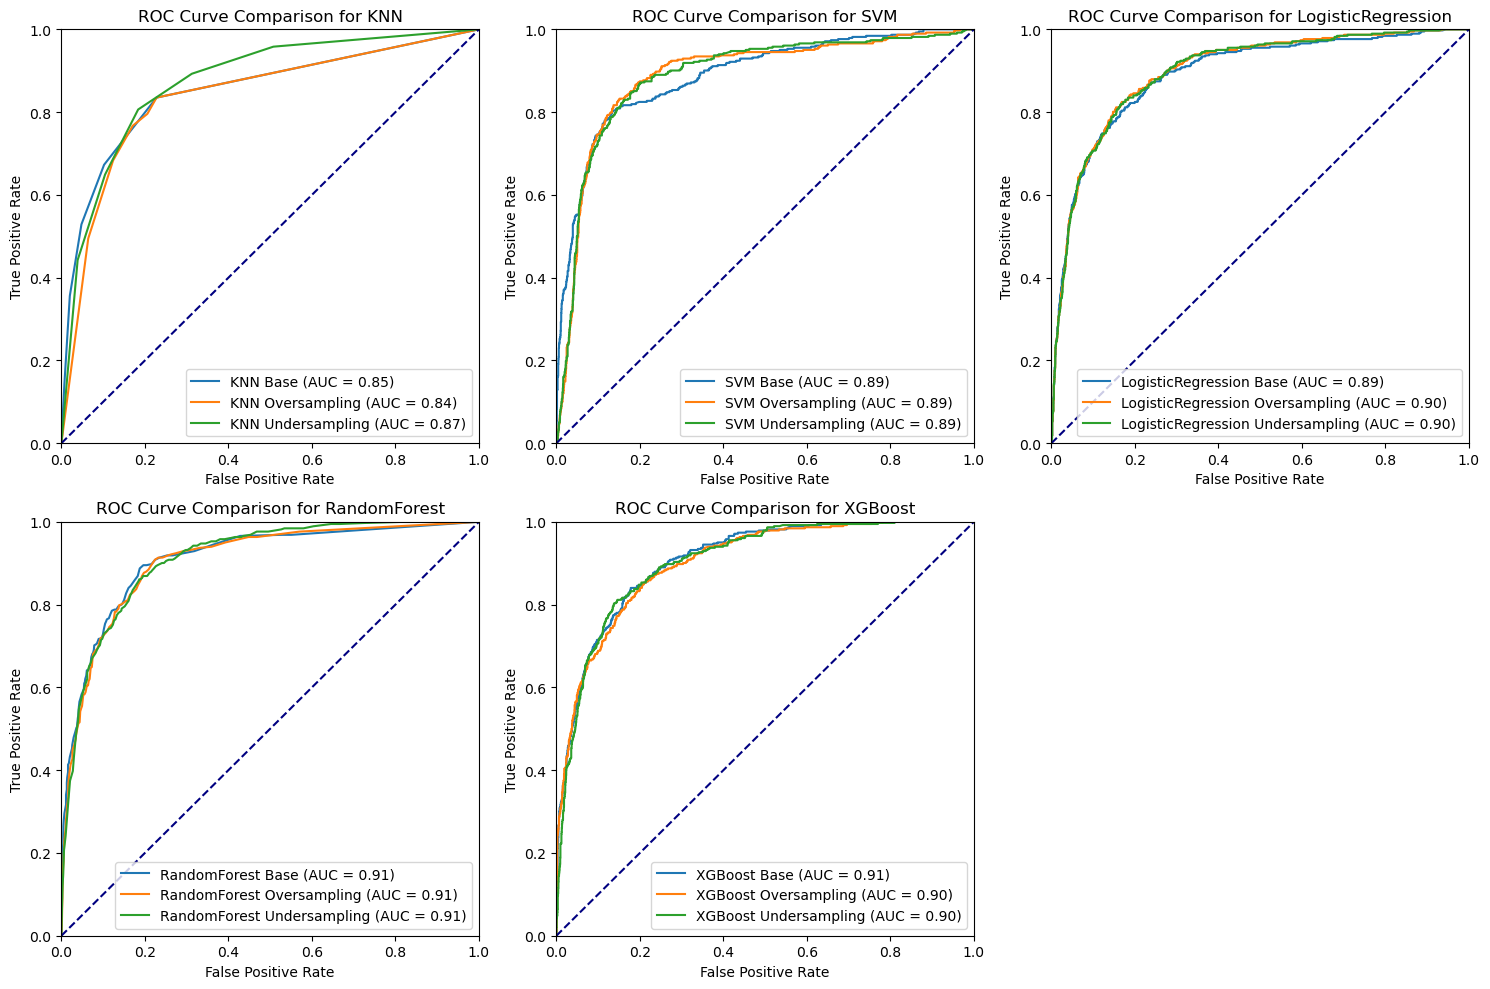

In [24]:
figure3 = sampling_comparison(top10results)

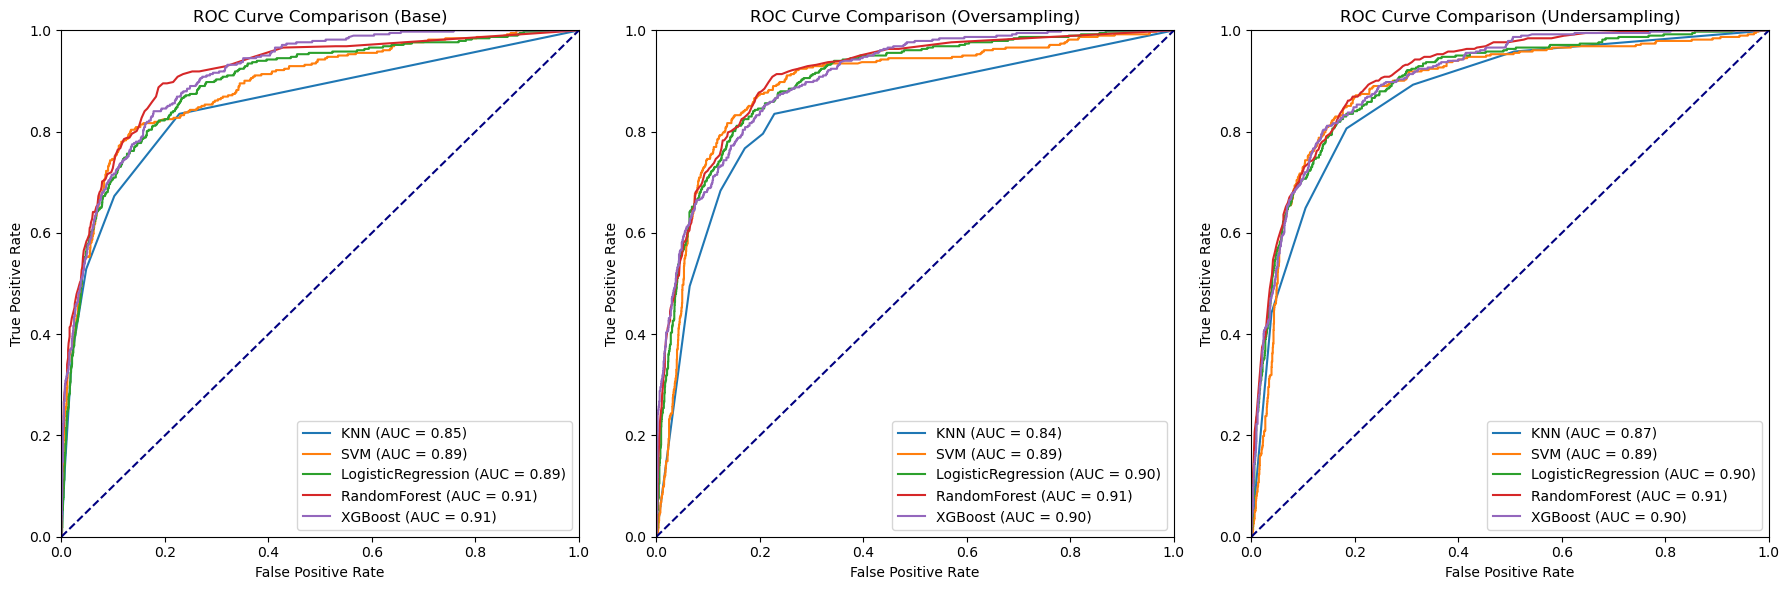

In [25]:
figure4 = model_comparison(top10results)

In [26]:
# cross-validation with RandomizedSearchCV (Hyperparameter Tuning for Random Forest)
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
cv = RandomizedSearchCV(rf, param_dist, n_iter=10, cv=5, scoring='f1', random_state=42)
cv.fit(X_train, y_train)

cv.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 20}

In [27]:
best_rf = cv.best_estimator_
y_pred_rf = best_rf.predict(X_test)
rf_f1 = f1_score(y_test, y_pred_rf)
print("Best Random Forest F1 Score on Test Set (Full Features): {:.3f}".format(rf_f1))

Best Random Forest F1 Score on Test Set (Full Features): 0.627
